# **Loading and Pre-Processing the Dataset**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px
from urllib.parse import urlparse

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
# Import the dataset
df=pd.read_csv('Dataset (1).csv')
df.head()

,URL,CLASS
0,https://linktr.ee/btinternetlee,Phishing
1,https://tinyurl.com/3j3k2mzd,Phishing
2,https://nevstr.weebly.com/,Phishing
3,https://link.account-update824.com/em=,Phishing
4,https://amazomerowihuiegarbcc.xyz/,Phishing


In [ ]:
df.tail()

,URL,CLASS
21576,http://codepen.io/api/oembed?url=http%3A%2F%2F...,Legitimate
21577,http://comicbook.com/2014/10/30/pee-wee-herman...,Legitimate
21578,http://comicbook.com/2014/12/25/top-ten-comic-...,Legitimate
21579,http://comicbook.com/2014/12/30/captain-americ...,Legitimate
21580,http://comicbook.com/2015/03/06/jared-leto-wan...,Legitimate


In [ ]:
df.shape

(21581, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


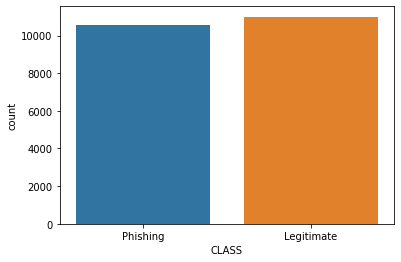

In [ ]:
df = pd.read_csv('Dataset (1).csv')
sns.countplot(df['CLASS'])
df1 = df.replace(['Phishing', 'Legitimate'], [0, 1])

In [ ]:
df1.head

<bound method NDFrame.head of                                                      URL  CLASS
0                        https://linktr.ee/btinternetlee      0
1                           https://tinyurl.com/3j3k2mzd      0
2                             https://nevstr.weebly.com/      0
3                 https://link.account-update824.com/em=      0
4                     https://amazomerowihuiegarbcc.xyz/      0
...                                                  ...    ...
21576  http://codepen.io/api/oembed?url=http%3A%2F%2F...      1
21577  http://comicbook.com/2014/10/30/pee-wee-herman...      1
21578  http://comicbook.com/2014/12/25/top-ten-comic-...      1
21579  http://comicbook.com/2014/12/30/captain-americ...      1
21580  http://comicbook.com/2015/03/06/jared-leto-wan...      1

[21581 rows x 2 columns]>

# **Feature Extraction for URL**

In [ ]:
# Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 0
  except:
    ip = 1
  return ip

In [ ]:
# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 0
  else:
    at = 1
  return at

In [ ]:
# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length =1
  else:
    length = 0
  return length

In [ ]:
# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def get_protocol(url):
    protocol = urlparse(url)
    if protocol.scheme == 'https':
        return 0
    else:
        return 1

In [ ]:
# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 0
    else:
      return 1
  else:
    return 1

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 0
    else:
        return 1



In [ ]:
# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 0
    else:
        return 1

In [ ]:
ip = []
attherate = []
url_length= []
protocol = []
singleSlash= []
doubleSlash= []
tinyurl = []
hyphen= []


In [ ]:
def extract_all_features():
  counter = 0
  for url in df['URL']:
        counter = counter + 1
        ip.append(havingIP(url))
        attherate.append(haveAtSign(url))
        url_length.append(getLength(url))
        singleSlash.append(getDepth(url))
        doubleSlash.append(redirection(url))
        protocol.append(get_protocol(url))
        hyphen.append(prefixSuffix(url))
        tinyurl.append(tinyURL(url))

In [ ]:
extract_all_features()

In [ ]:
features_df = pd.DataFrame()
features_df["IP Check"] = ip
features_df["At The Rate"] = attherate
features_df["URL Length"] = url_length
features_df["Single Slash"] = singleSlash
features_df["Double Slash"] = doubleSlash
features_df["HTTP/HTTPS"] = protocol
features_df["Hyphen "] = hyphen
features_df["Tiny URL"] = tinyurl
features_df["Class"] = df1.CLASS

In [ ]:
features_df.head(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
0,1,1,1,1,1,0,1,1,0
1,1,1,1,1,1,0,1,0,0
2,1,1,1,0,1,0,1,1,0
3,1,1,1,1,1,0,0,1,0
4,1,1,1,0,1,0,1,1,0
5,1,1,1,0,1,0,0,1,0
6,1,1,1,2,1,1,1,1,0
7,1,1,1,1,1,0,1,1,0
8,1,1,1,1,1,0,0,1,0
9,1,1,1,2,1,0,1,1,0


In [ ]:
features_df.tail(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
21561,1,1,0,5,1,1,1,1,1
21562,1,1,0,3,1,1,1,1,1
21563,1,1,0,3,1,1,1,1,1
21564,1,1,0,3,1,1,1,1,1
21565,1,1,0,3,1,1,1,1,1
21566,1,1,0,3,1,1,1,1,1
21567,1,1,0,2,1,1,1,1,1
21568,1,1,0,2,1,1,1,1,1
21569,1,1,0,3,1,1,1,1,1
21570,1,1,0,4,1,1,1,1,1


In [ ]:
features_df.shape

(21581, 9)

# **Building the ANN model**

In [ ]:
X=features_df.iloc[:,0:8].values
y=features_df.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(10))

In [ ]:
X_train.shape

(17264, 8)

In [ ]:
y_train.shape

(17264,)

In [ ]:
!pip install -q keras

In [ ]:
#import all the necessary libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

In [ ]:
# Build the ANN Model
model = Sequential()

model.add(Dense(50, activation='relu',kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(50, activation='relu',kernel_initializer='uniform'))
model.add(Dense(30, activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
#Summary of ANN Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, callbacks=[es_cb],validation_split=0.2)

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/30
432/432 [==============================] - 2s 3ms/step - loss: 0.6508 - accuracy: 0.7490 - val_loss: 0.5266 - val_accuracy: 0.8335
Epoch 2/30
432/432 [==============================] - 1s 3ms/step - loss: 0.4003 - accuracy: 0.8665 - val_loss: 0.3137 - val_accuracy: 0.8966
Epoch 3/30
432/432 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.8959 - val_loss: 0.2814 - val_accuracy: 0.8972
Epoch 4/30
432/432 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.8979 - val_loss: 0.2761 - val_accuracy: 0.9067
Epoch 5/30
432/432 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.9015 - val_loss: 0.2687 - val_accuracy: 0.9062
Epoch 6/30
432/432 [==============================] - 2s 5ms/step - loss: 0.2744 - accuracy: 0.9017 - val_loss: 0.2660 - val_accuracy: 0.9067
Epoch 7/30
432/432 [==============================] - 3s 6ms/step - loss: 0.2724 - accuracy: 0.9024 - val_loss: 0.2643 - val_accuracy: 0.9067
Epoch 

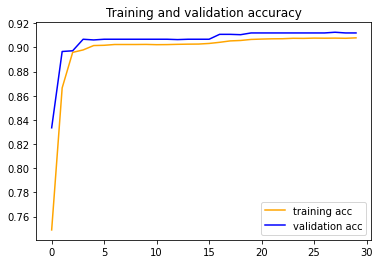

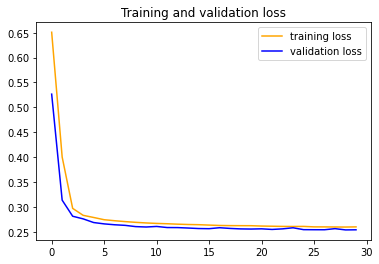

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('model_ann.h5')

In [ ]:
prediction=model.predict(X_test)
pred = np.array([1 if i >= 0.5 else 0 for i in prediction])

In [ ]:
accuracy_score=accuracy_score(y_test,pred)*100

print(accuracy_score)

90.38684271484827


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, pred)*100}")

Precision Score of the classifier is: 87.80804150453956


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, pred)*100}")

Recall Score of the classifier is: 93.8539741219963


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, pred)*100}")

F1 Score of the classifier is: 90.73039982130891


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2004
           1       0.94      0.88      0.91      2313

    accuracy                           0.90      4317
   macro avg       0.90      0.91      0.90      4317
weighted avg       0.91      0.90      0.90      4317



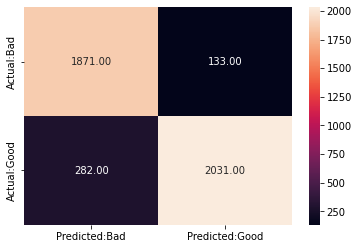

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(pred,y_test))
con  = pd.DataFrame(confusion_matrix(pred,y_test), columns = ['Predicted:Bad', 'Predicted:Good'], index = ['Actual:Bad', 'Actual:Good'])
sns.heatmap(con,annot=True,fmt='.2f')

AUC for our classifier is: 93.63605612424053


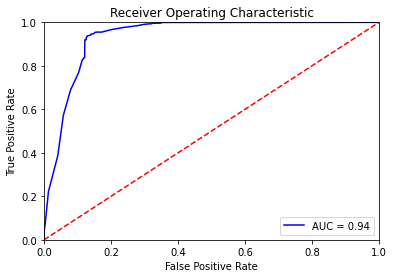

In [ ]:
from sklearn.metrics import roc_curve, auc

predict_prob=model.predict(X_test)

preds = predict_prob[:]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc*100}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Building the CNN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten, Embedding

In [ ]:
model1= Sequential()

vocab_size=1
embedding_dim=8
maxlen=21581

#Conv layer
model1.add(Conv1D(128, kernel_size=(2),activation='relu',input_shape=(8,1)))

#Pooling Layer
model1.add(MaxPool1D(pool_size=(2)))

#Conv layer
model1.add(Conv1D(64, kernel_size=(2),activation='relu'))

#Pooling Layer
model1.add(MaxPool1D(pool_size=(2)))

#Fully connected Layer
model1.add(Dense(100,activation='relu'))

#output Layer
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 128)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 dense_4 (Dense)             (None, 1, 100)            6500      
                                                                 
 dense_5 (Dense)             (None, 1, 1)             

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
from keras import callbacks
es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],8,1)

In [ ]:
X_train.shape

(17264, 8, 1)

In [ ]:
X_test.shape

(4317, 8)

In [ ]:
X_test=X_test.reshape(X_test.shape[0],8,1)

In [ ]:
y_train=y_train.reshape(y_train.shape[0],1,1)

In [ ]:
y_train.shape

(17264, 1, 1)

In [ ]:
y_test=y_test.reshape(y_test.shape[0],1,1)

In [ ]:
y_test.shape

(4317, 1, 1)

In [ ]:
history = model1.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, callbacks=[es_cb],validation_split=0.2)

scores = model1.evaluate(X_test, y_test)
print('\nAccuracy score of CNN Neural Network {0:.2f}%'.format(scores[1]*100))

Epoch 1/30
432/432 [==============================] - 3s 5ms/step - loss: 0.3466 - accuracy: 0.8723 - val_loss: 0.2732 - val_accuracy: 0.9036
Epoch 2/30
432/432 [==============================] - 2s 4ms/step - loss: 0.2795 - accuracy: 0.9023 - val_loss: 0.2661 - val_accuracy: 0.9091
Epoch 3/30
432/432 [==============================] - 2s 5ms/step - loss: 0.2738 - accuracy: 0.9027 - val_loss: 0.2749 - val_accuracy: 0.9088
Epoch 4/30
432/432 [==============================] - 2s 4ms/step - loss: 0.2696 - accuracy: 0.9046 - val_loss: 0.2578 - val_accuracy: 0.9091
Epoch 5/30
432/432 [==============================] - 2s 4ms/step - loss: 0.2645 - accuracy: 0.9059 - val_loss: 0.2529 - val_accuracy: 0.9123
Epoch 6/30
432/432 [==============================] - 2s 4ms/step - loss: 0.2631 - accuracy: 0.9063 - val_loss: 0.2535 - val_accuracy: 0.9123
Epoch 7/30
432/432 [==============================] - 2s 4ms/step - loss: 0.2611 - accuracy: 0.9072 - val_loss: 0.2508 - val_accuracy: 0.9123
Epoch 

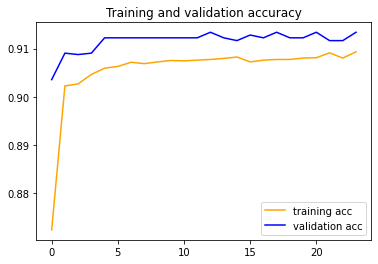

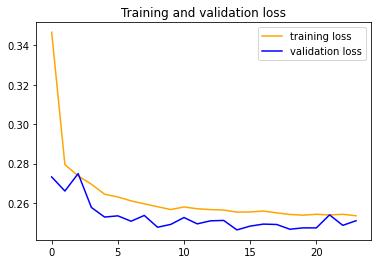

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model1.save('model_cnn.h5')

In [ ]:
X_test.shape

In [ ]:
prediction=model1.predict(X_test)
pred = np.array([1 if i >= 0.5 else 0 for i in prediction])

In [ ]:
y_test=y_test.reshape(y_test.shape[0],)

In [ ]:
accuracy_score=accuracy_score(y_test,pred)*100

print(accuracy_score)

90.47949965253649


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, pred)*100}")

Precision Score of the classifier is: 87.44126441691584


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, pred)*100}")

Recall Score of the classifier is: 94.59334565619224


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, pred)*100}")

F1 Score of the classifier is: 90.87680355160933


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1976
           1       0.95      0.87      0.91      2341

    accuracy                           0.90      4317
   macro avg       0.90      0.91      0.90      4317
weighted avg       0.91      0.90      0.90      4317



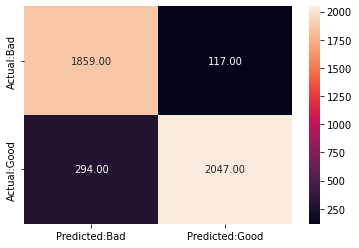

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(pred,y_test))
con  = pd.DataFrame(confusion_matrix(pred,y_test), columns = ['Predicted:Bad', 'Predicted:Good'], index = ['Actual:Bad', 'Actual:Good'])
sns.heatmap(con,annot=True,fmt='.2f')

AUC for our classifier is: 93.63605612424053


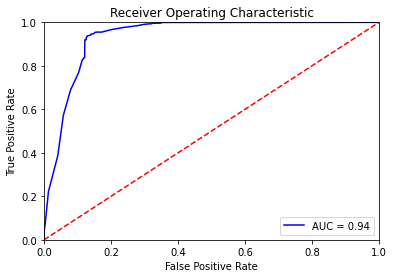

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict(X_test)
preds = class_probabilities[:]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc*100}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()